# Building a simple DL for the titanic dataset from Kaggle

Importing dataset  (dataset can be found in https://www.kaggle.com/c/titanic/data)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory data analysis

Performing some data exploration with seaborn

In [4]:
import seaborn as sns
%matplotlib inline

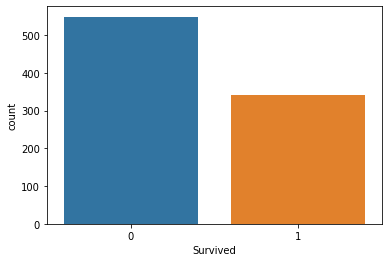

In [5]:
sns.countplot(x='Survived',data=data)


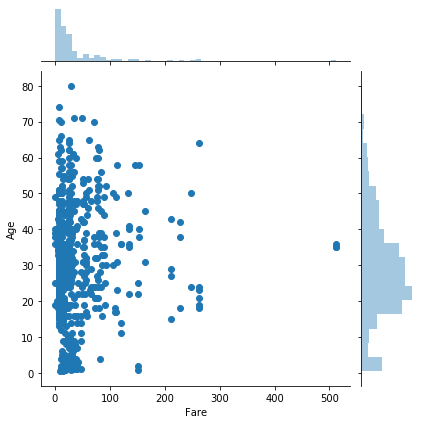

In [6]:
sns.jointplot(x='Fare',y='Age',data=data)

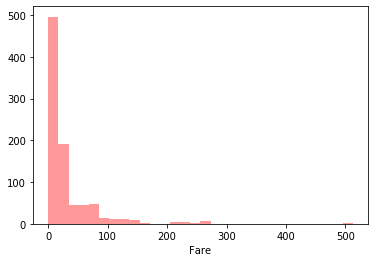

In [7]:
sns.distplot(data['Fare'],bins=30,kde=False,color='red')

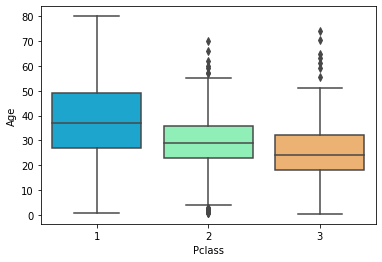

In [8]:
sns.boxplot(x='Pclass',y='Age',data=data,palette='rainbow')

C:\Users\fmartignone\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\fmartignone\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


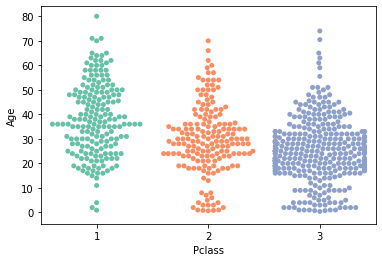

In [9]:
sns.swarmplot(x='Pclass',y='Age',data=data,palette='Set2')

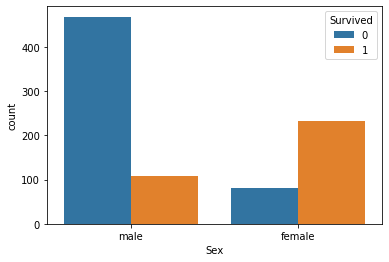

In [10]:
sns.countplot(x='Sex',data=data, hue='Survived')

# Performing some data engineering

In [11]:
data['Cabin_class'] = data['Cabin'].str.get(0)

In [12]:
data.loc[data['Cabin_class'].isna()==True,'Cabin_class']='Sem classificacao'

In [13]:
df = pd.get_dummies(data['Cabin_class'])

In [14]:
data = pd.concat([data, df], axis=1)

In [15]:
df = pd.get_dummies(data['Pclass'],prefix='Class')

In [16]:
data = pd.concat([data, df], axis=1)

In [17]:
df = pd.get_dummies(data['Sex'])

In [18]:
data = pd.concat([data, df], axis=1)

In [19]:
df = pd.get_dummies(data['Parch'],prefix='Parch')

In [20]:
data = pd.concat([data, df], axis=1)

In [21]:
df = pd.get_dummies(data['Embarked'],prefix='Embarked')

In [22]:
data = pd.concat([data, df], axis=1)

In [23]:
df = pd.get_dummies(data['SibSp'],prefix='SibSp')

In [24]:
data = pd.concat([data, df], axis=1)

In [25]:
data.groupby(['SibSp']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,...,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
SibSp,,,,,,,,,,,,,,,,,,,,,
0,608,608,608,608,608,471,608,608,608,126,...,608,608,608,608,608,608,608,608,608,608
1,209,209,209,209,209,183,209,209,209,69,...,209,209,209,209,209,209,209,209,209,209
2,28,28,28,28,28,25,28,28,28,6,...,28,28,28,28,28,28,28,28,28,28
3,16,16,16,16,16,12,16,16,16,3,...,16,16,16,16,16,16,16,16,16,16
4,18,18,18,18,18,18,18,18,18,0,...,18,18,18,18,18,18,18,18,18,18
5,5,5,5,5,5,5,5,5,5,0,...,5,5,5,5,5,5,5,5,5,5
8,7,7,7,7,7,0,7,7,7,0,...,7,7,7,7,7,7,7,7,7,7


In [26]:
data['Survived_'] = data['Survived']

In [27]:
df = data.drop(['PassengerId','Name','Sex','Parch','Ticket','SibSp','Embarked','Cabin_class','Cabin','Survived','Sem classificacao'],axis=1)

In [28]:
df.dropna(axis='columns',inplace=True)

In [29]:
df.dropna(axis='rows',inplace=True)

In [30]:
X = df.drop('Survived_',axis=1).values
y = df['Survived_'].values

In [31]:
#  Splitting train and test data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

# Scaling and fitting data

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

In [38]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.055628,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.444099,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.103644,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.024350,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1.0,0.015713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
219,1.0,0.014110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
220,1.0,0.015127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.5,0.076123,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Creating a DL model in Tensorflow with dropout layers

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

Adding a earlystopping callback

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [44]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/50
21/21 [==============================] - 1s 38ms/step - loss: 0.6444 - val_loss: 0.6121
Epoch 2/50
21/21 [==============================] - 0s 12ms/step - loss: 0.5840 - val_loss: 0.5659
Epoch 3/50
21/21 [==============================] - 0s 10ms/step - loss: 0.5235 - val_loss: 0.5287
Epoch 4/50
21/21 [==============================] - 0s 11ms/step - loss: 0.4918 - val_loss: 0.5038
Epoch 5/50
21/21 [==============================] - 0s 10ms/step - loss: 0.4626 - val_loss: 0.5049
Epoch 6/50
21/21 [==============================] - 0s 11ms/step - loss: 0.4670 - val_loss: 0.4950
Epoch 7/50
21/21 [==============================] - 0s 11ms/step - loss: 0.4351 - val_loss: 0.4889
Epoch 8/50
21/21 [==============================] - 0s 13ms/step - loss: 0.4423 - val_loss: 0.4866
Epoch 9/50
21/21 [==============================] - 0s 12ms/step - loss: 0.4347 - val_loss: 0.4834
Epoch 10/50
21/21 [==============================] - ETA: 0s - loss: 0.449 - 0s 11ms/step - loss: 0.4267 - va

In [45]:
model_loss = pd.DataFrame(model.history.history)

# Comparing losses to validation losses


In [46]:
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline

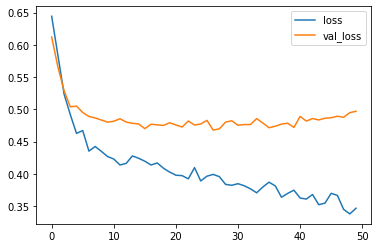

In [48]:
model_loss.plot()

# Predicting outcomes with test data and printing results

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.90      0.81       127
           1       0.81      0.59      0.69        96

    accuracy                           0.77       223
   macro avg       0.78      0.75      0.75       223
weighted avg       0.77      0.77      0.76       223



In [53]:
confusion_matrix(y_test,predictions)

array([[114,  13],
       [ 39,  57]], dtype=int64)